# HOMEWORK 6 Assignment 4

### Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np


%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json


Populating the interactive namespace from numpy and matplotlib


In [31]:
import scipy.stats

In [2]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))
#this works in the command line, but is not working in the jupyter notebook when putting data in place

#create the env variable if missing-- needed to create
#added PUI2018 to path 
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))


# # move the data
# !mv bustimes.txt $PUIDATA

PUIdata /nfshome/sjf374/PUIdata
PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [4]:
#choosing january and june 
datestring01 = '201501'
getCitiBikeCSV(datestring01)
datestring06 = '201506'
getCitiBikeCSV(datestring06)

file in place, you can continue
file in place, you can continue


In [5]:
#making the files into dataframes
df01 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring01 + '-citibike-tripdata.csv')
df01.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [6]:
df06 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring06 + '-citibike-tripdata.csv')
df06.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [7]:
#concating files together
df = pd.concat([df01, df06])

In [8]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [9]:
# df is the dataframe where the content of the csv file is stored
#make interested datetime column into the proper format
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [10]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
941214,1053,6/30/2015 23:59,7/1/2015 0:17,323,Lawrence St & Willoughby St,40.692362,-73.986317,436,Hancock St & Bedford Ave,40.682166,-73.953990,17785,Subscriber,1989.0,1,2015-06-30 23:59:00
941215,1149,6/30/2015 23:59,7/1/2015 0:18,116,W 17 St & 8 Ave,40.741776,-74.001497,487,E 20 St & FDR Drive,40.733143,-73.975739,21612,Customer,NaN,0,2015-06-30 23:59:00
941216,3557,6/30/2015 23:59,7/1/2015 0:58,454,E 51 St & 1 Ave,40.754557,-73.965930,418,Front St & Gold St,40.702240,-73.982578,19976,Customer,NaN,0,2015-06-30 23:59:00
941217,819,6/30/2015 23:59,7/1/2015 0:13,410,Suffolk St & Stanton St,40.720664,-73.985180,345,W 13 St & 6 Ave,40.736494,-73.997044,15932,Subscriber,1976.0,1,2015-06-30 23:59:00
941218,667,6/30/2015 23:59,7/1/2015 0:10,308,St James Pl & Oliver St,40.713079,-73.998512,2008,Little West St & 1 Pl,40.705693,-74.016777,16915,Subscriber,1982.0,1,2015-06-30 23:59:00


In [11]:
#reset index since the two dataframes are concatinated 
df.reset_index(inplace=True, drop=True)

In [12]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [13]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

**H0: there is no statistical difference in the duration of bike ride distribution for day and night time rides - specifically looking at the start time of a ride**
$$ \alpha = 0.05 $$



day = 6 am to 5:59 pm

night = 6 pm to 5:59 am 

In [14]:
df['usertype'].unique()
#why only subscriber?

array(['Subscriber', 'Customer'], dtype=object)

In [15]:
#df is the dataframe where the content of the csv file is stored
df['dur_day'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]
df['dur_night'] = df['tripduration'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour >= 18) |  (df['date'].dt.hour <6))]

In [16]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dur_day,dur_night
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,1346.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,NaN,363.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,NaN,346.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,NaN,182.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,NaN,969.0


In [17]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dur_day,dur_night
1226766,1053,6/30/2015 23:59,7/1/2015 0:17,323,Lawrence St & Willoughby St,40.692362,-73.986317,436,Hancock St & Bedford Ave,40.682166,-73.953990,17785,Subscriber,1989.0,1,2015-06-30 23:59:00,NaN,1053.0
1226767,1149,6/30/2015 23:59,7/1/2015 0:18,116,W 17 St & 8 Ave,40.741776,-74.001497,487,E 20 St & FDR Drive,40.733143,-73.975739,21612,Customer,NaN,0,2015-06-30 23:59:00,NaN,NaN
1226768,3557,6/30/2015 23:59,7/1/2015 0:58,454,E 51 St & 1 Ave,40.754557,-73.965930,418,Front St & Gold St,40.702240,-73.982578,19976,Customer,NaN,0,2015-06-30 23:59:00,NaN,NaN
1226769,819,6/30/2015 23:59,7/1/2015 0:13,410,Suffolk St & Stanton St,40.720664,-73.985180,345,W 13 St & 6 Ave,40.736494,-73.997044,15932,Subscriber,1976.0,1,2015-06-30 23:59:00,NaN,819.0
1226770,667,6/30/2015 23:59,7/1/2015 0:10,308,St James Pl & Oliver St,40.713079,-73.998512,2008,Little West St & 1 Pl,40.705693,-74.016777,16915,Subscriber,1982.0,1,2015-06-30 23:59:00,NaN,667.0


In [18]:
#dropping some data I no longer need
wdf = df[['dur_day', 'dur_night']]
wdf.head()

,dur_day,dur_night
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [19]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
wdf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,dur_day,dur_night
count,753345.000000,337417.000000
mean,734.250235,751.442995
std,2427.034417,2136.701098
min,60.000000,60.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,707490.000000,518019.000000


### Of interest: 
    there are more day trips than night trips
    the mean is larger for day trips
    the standard deviation is larger for night trips
    1 second is always the minimum amount for a trip
    (717 vs. 715 min) The max time a bike ride lasts for is about 12 hours for both day and night. 


In [20]:
wdf.head()

,dur_day,dur_night
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [21]:
# dropping NaN values
dayseries = wdf['dur_day'].dropna()
nightseries = wdf['dur_night'].dropna()

## Inspect the Data Further

In [22]:
dayseries.describe()

count    753345.000000
mean        734.250235
std        2427.034417
min          60.000000
25%         364.000000
50%         562.000000
75%         883.000000
max      707490.000000
Name: dur_day, dtype: float64

In [23]:
dayseries.quantile([.25, .5, .996])

0.250     364.000
0.500     562.000
0.996    3217.624
Name: dur_day, dtype: float64

In [24]:
nightseries.describe()

count    337417.000000
mean        751.442995
std        2136.701098
min          60.000000
25%         364.000000
50%         574.000000
75%         914.000000
max      518019.000000
Name: dur_night, dtype: float64

In [25]:
nightseries.quantile([.25, .5, .996])

0.250     364.000
0.500     574.000
0.996    3129.336
Name: dur_night, dtype: float64

In [26]:
#setting upper limit to 3600 caprtures 99.6% of the data for both day and night

Text(0.5,1,'night riders')

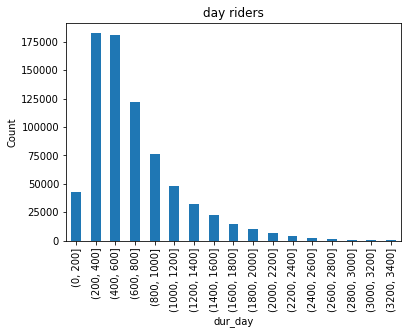

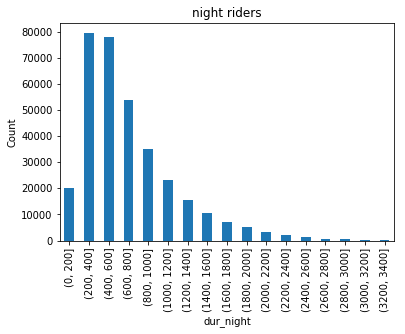

In [27]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0,3600, 200)
axD = dayseries.groupby(pd.cut(dayseries, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_ylabel('Count')
axD.set_title("day riders")
axN = nightseries.groupby(pd.cut(nightseries, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_ylabel('Count')
axN.set_title("night riders")


**Figure 1: histogrammed distribution of ride duration by Day or Night **
The distribution of ride duration seems very similar when binned. visually the major difference is the overall counts.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
dur_day                    
(0, 200]           0.003228
(200, 400]         0.003812
(400, 600]         0.013898
(600, 800]         0.016877
(800, 1000]        0.014258
(1000, 1200]       0.009867
(1200, 1400]       0.006658
(1400, 1600]       0.004894
(1600, 1800]       0.003334
(1800, 2000]       0.001889
(2000, 2200]       0.000802
(2200, 2400]       0.000545
(2400, 2600]       0.000206
(2600, 2800]       0.000112
(2800, 3000]       0.000028
(3000, 3200]       0.000011
(3200, 3400]       0.000000


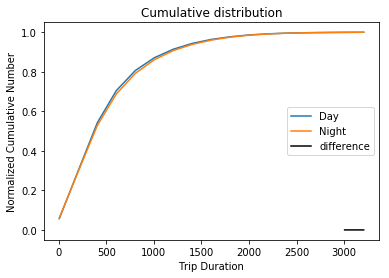

In [28]:
#normalize distributions and count the cumulative sum

csD=dayseries.groupby(pd.cut(dayseries, bins)).agg([count_nonzero]).cumsum()

csN=nightseries.groupby(pd.cut(nightseries, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.title('Cumulative distribution')
pl.legend()

** Figure 2: the cumulative distribution of CitiBike ride durations by time of day**
This graph further solidifies the lack of difference between Day and Night distribution

They look similar! The difference doesn't even make it to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [29]:
 
#will leave it here to keep it consistent
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [32]:
ks = scipy.stats.ks_2samp(dayseries, nightseries)
print (ks)

Ks_2sampResult(statistic=0.017669869577360831, pvalue=1.175722742205841e-63)


**  FILL IN THE CELL BELOW!**

### We are able to reject the null hypothesis since the p value (1.18e-32) is much smaller than .05

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [33]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
# NOT REQUIRED?

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [34]:
dayseries.size

753345

In [35]:
nightseries.size

337417

In [36]:
#reducted day series

In [37]:
Rdayseries = dayseries.sample(n=337417, random_state=666)

In [38]:
Rdayseries.size

337417

In [ ]:
#run pearson test

In [40]:
scipy.stats.pearsonr(Rdayseries, nightseries)

(0.00052447495041544484, 0.76062981232259386)

"The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so." - lukily these datasets do comply

From a linear correlation standpoint these datasets do not have much correlation as the correlation coefficient is so close to 0. Of course this is assuming a lot: that the correlation would be linear and that the two datasets have a normal distribution. 

We are unable to reject the null with such a high p value (.760)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [ ]:
#run spearman test

In [42]:
scipy.stats.spearmanr(np.sort(Rdayseries), np.sort(nightseries))

SpearmanrResult(correlation=0.99999914268971357, pvalue=0.0)

The p value is less than .05 so we can reject the null. that fact that the correlation is so close to 1 is very representative of the distributions. This is only true when sorted. 

In this test, it is not assumed that the distribution is normal.


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**